# Activity 2.1 : Convolutional Neural Network


#### Objective(s):

This activity aims to introduce how to build a convolutional neural network


#### Intended Learning Outcomes (ILOs):

- Demonstrate how to build and train convolutional neural network
- Evaluate the accuracy and loss of the model using convolutional neural network


#### Resources:

- Jupyter Notebook
- CIFAR-10 dataset


#### Procedures

Load the necessary libraries


In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

- Shuffle the data
- Split the data into train and test sets


In [2]:
def plot_loss_acc(values,model_name='Model'):
    labels = ['loss','accuracy']
    colors = ['#1f77b4', '#2ca02c']
    plt.figure(figsize=(5,1.2))
    plt.table(cellText=[[labels[0],"{:.4f}".format(values[0])], [labels[1], "{:.2%}".format(values[1])]],
            colWidths=[0.8, 0.8],
            cellLoc='center',
            loc='center',
            cellColours=[['lightgrey', colors[0]], ['lightgrey', colors[1]]])
    plt.title(model_name+' Loss and Accuracy',y=0.7)
    plt.axis('off')
    plt.tight_layout() 

def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross Entropy Loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
import pandas as pd
"""
def get_label(label):
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return classes[label]
"""
def to_csv(x,y,name):
    x = x.reshape(x.shape[0],-1)
    temp_df = pd.DataFrame(x)
    temp_df['label'] = [label[0] for label in y]
    temp_df.to_csv(f'{name}.csv', index=False)
    print(name,'saved successfully')

#to_csv(x_train, y_train, 'train')
#to_csv(x_test, y_test, 'test')

test saved successfully


Check the image size


In [6]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images


[9]


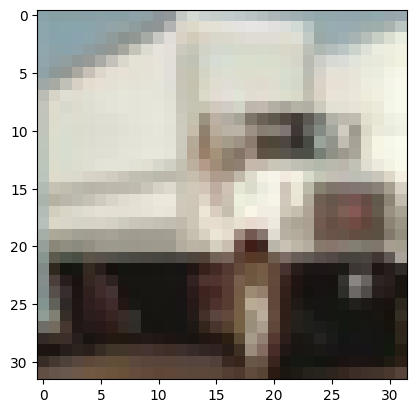

In [5]:
print(y_train[444])
plt.imshow(x_train[444]);

In [7]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position


In [8]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets


In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential


In [10]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                      

- Use batch size of 32
- Initiate RMSprop optimizer
- Train the model using RMSprop


In [11]:
from time import time
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))
model1_time = time() - start

Epoch 1/15


1563/1563 [==============================] - 24s 14ms/step - loss: 1.7585 - accuracy: 0.3577 - val_loss: 1.4625 - val_accuracy: 0.4693
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4784 - accuracy: 0.4699 - val_loss: 1.3341 - val_accuracy: 0.5245
Epoch 3/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3677 - accuracy: 0.5103 - val_loss: 1.2701 - val_accuracy: 0.5429
Epoch 4/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2995 - accuracy: 0.5353 - val_loss: 1.1806 - val_accuracy: 0.5820
Epoch 5/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2483 - accuracy: 0.5580 - val_loss: 1.1374 - val_accuracy: 0.5950
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2098 - accuracy: 0.5724 - val_loss: 1.1257 - val_accuracy: 0.6024
Epoch 7/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1857 - accuracy: 0.5835 - val_loss: 1.1099

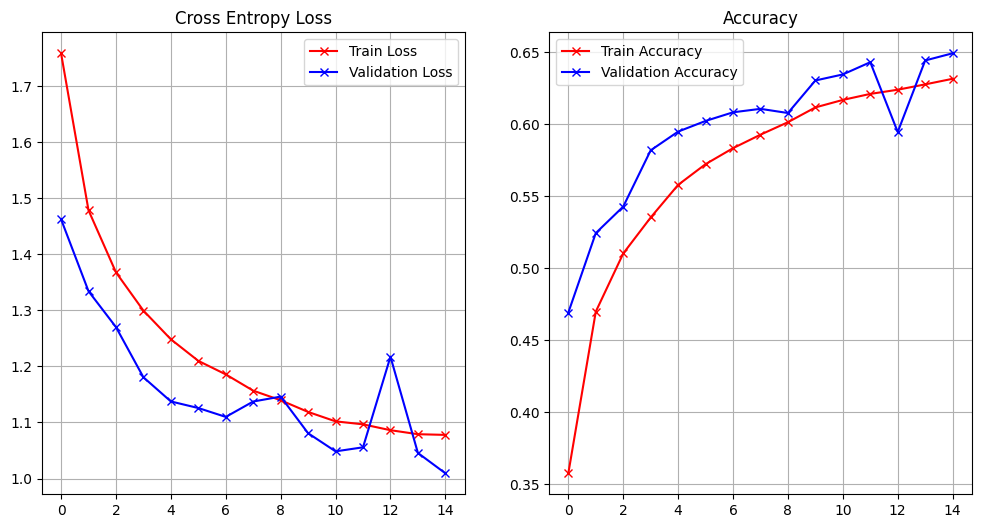

In [12]:
plot_loss_accuracy(history)

The loss of both training and validation sets are close to each other albeit in a high value at 1.1. Meanwhile, the accuracy is going up to a low number of sixty percent. The model's prediction performance is bad. More training is needed and modifying some paramters might increase the performance.

1563/1563 [==============================] - 8s 5ms/step - loss: 0.8601 - accuracy: 0.7040


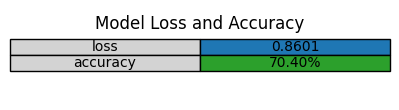

In [13]:
model1_train_eval = model_1.evaluate(x_train,y_train)
plot_loss_acc(model1_train_eval)

313/313 [==============================] - 1s 5ms/step - loss: 1.0093 - accuracy: 0.6494


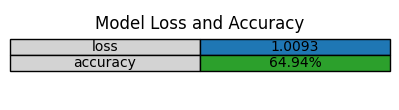

In [14]:
model1_test_eval = model_1.evaluate(x_test,y_test)
plot_loss_acc(model1_test_eval)

The model took a little more than five minutes to train in fifteen epochs. With a learning rate of 0.005, the model got a pretty high cross entropy loss at around 1 and an accuracy around 60 to 70 percent in training and testing dataset. The accuracy of the model is extremely poor in both training and validation sets. Modification of the network and parameters might increase its performance. 

#### Supplementary Activity


- Build a more complicated model with the following pattern:
  Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

- Write the number of parameters of your model and compare it to the previous model

- Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

- Use different structures and run times, and see how accurate your model can be.


In [20]:
model_2 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
#Flatten
model_2.add(Flatten())
#Dense
model_2.add(Dense(512))

#Final Classification
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_10 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                      

![Alt text](Model1andModel2..png)


The second model have 232, 426 total paramters all of which are trainable. This model's first and second convolution layers are identical to the first one with 2, 432 and 25, 632 parameters. They also have identical number of paramters in dense and in the final classification dense with the first model at 147, 968 and 5130 parameters. The difference is that the second model have two more convolutional layer adding two 25, 632 paramters. Thus, the second model is up by 50, 000 parameters.


In [21]:
batch_size = 32
epoch = 5

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_2 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))
model2_time = time() - start

Epoch 1/5
1563/1563 [==============================] - 117s 73ms/step - loss: 1.6620 - accuracy: 0.3940 - val_loss: 1.2930 - val_accuracy: 0.5301
Epoch 2/5
1563/1563 [==============================] - 132s 84ms/step - loss: 1.3101 - accuracy: 0.5310 - val_loss: 1.2588 - val_accuracy: 0.5548
Epoch 3/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.1619 - accuracy: 0.5901 - val_loss: 1.3965 - val_accuracy: 0.5587
Epoch 4/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.0694 - accuracy: 0.6247 - val_loss: 0.9788 - val_accuracy: 0.6600
Epoch 5/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.0064 - accuracy: 0.6489 - val_loss: 0.9932 - val_accuracy: 0.6630


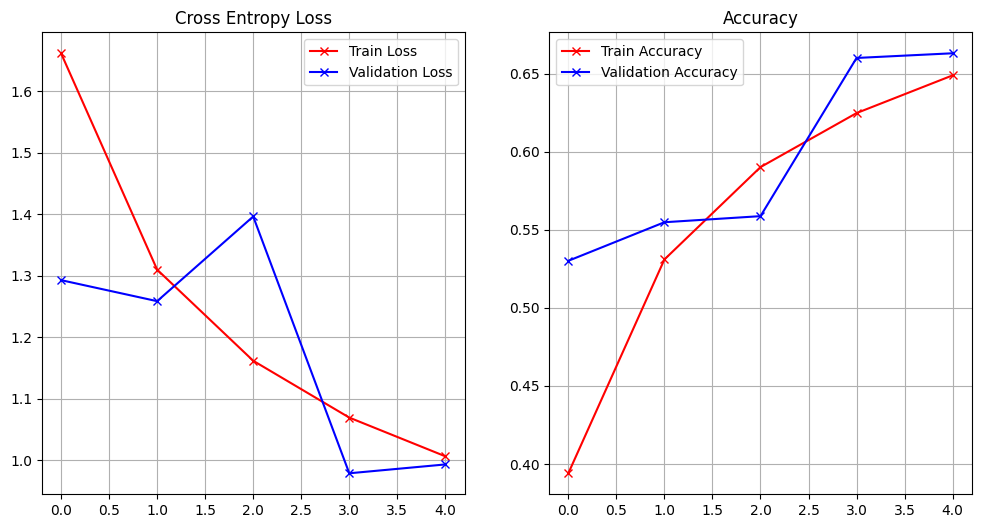

In [22]:
plot_loss_accuracy(history_2)

1563/1563 [==============================] - 35s 23ms/step - loss: 0.9147 - accuracy: 0.6873


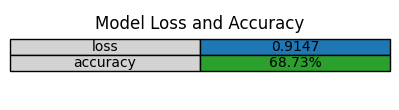

In [23]:
model2_train_eval = model_2.evaluate(x_train,y_train)
plot_loss_acc(model2_train_eval)

313/313 [==============================] - 8s 25ms/step - loss: 0.9932 - accuracy: 0.6630


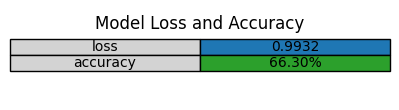

In [24]:
model2_test_eval = model_2.evaluate(x_test,y_test)
plot_loss_acc(model2_test_eval)

Trying to increase the accuracy


In [26]:
from keras.layers import AveragePooling2D
#Lenet
model_3 = Sequential()

#Conv1
model_3.add(Conv2D(6, (5, 5), strides=(1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_3.add(Activation('tanh'))

#AvePool1
model_3.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model_3.add(Dropout(0.25))

#Conv2
model_3.add(Conv2D(16, (5, 5), strides=(1,1)))
model_3.add(Activation('tanh'))

#AvePool2
model_3.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model_3.add(Dropout(0.25))

#Conv3
model_3.add(Conv2D(120, (5, 5), strides=(1,1)))
model_3.add(Activation('tanh'))

#Flatten
model_3.add(Flatten())

#Dense
model_3.add(Dense(120, activation='tanh'))

#Dense
model_3.add(Dense(84, activation='tanh'))

#Final Classification
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 activation_18 (Activation)  (None, 32, 32, 6)         0         
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 6)         0         
 gePooling2D)                                                    
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 6)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 activation_19 (Activation)  (None, 12, 12, 16)        0         
                                                      

In [27]:
from keras.optimizers import Adam
batch_size = 100
epoch = 20
opt = Adam(learning_rate=0.0001)

model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_train, y_train))

Epoch 1/20
500/500 [==============================] - 25s 43ms/step - loss: 2.0828 - accuracy: 0.2311 - val_loss: 1.8914 - val_accuracy: 0.3358
Epoch 2/20
500/500 [==============================] - 18s 37ms/step - loss: 1.9067 - accuracy: 0.3185 - val_loss: 1.8066 - val_accuracy: 0.3738
Epoch 3/20
500/500 [==============================] - 18s 36ms/step - loss: 1.8561 - accuracy: 0.3433 - val_loss: 1.7720 - val_accuracy: 0.3857
Epoch 4/20
500/500 [==============================] - 18s 35ms/step - loss: 1.8290 - accuracy: 0.3559 - val_loss: 1.7500 - val_accuracy: 0.3950
Epoch 5/20
500/500 [==============================] - 18s 35ms/step - loss: 1.8125 - accuracy: 0.3627 - val_loss: 1.7402 - val_accuracy: 0.3969
Epoch 6/20
500/500 [==============================] - 18s 36ms/step - loss: 1.7985 - accuracy: 0.3677 - val_loss: 1.7234 - val_accuracy: 0.4057
Epoch 7/20
500/500 [==============================] - 18s 36ms/step - loss: 1.7889 - accuracy: 0.3726 - val_loss: 1.7108 - val_accuracy:

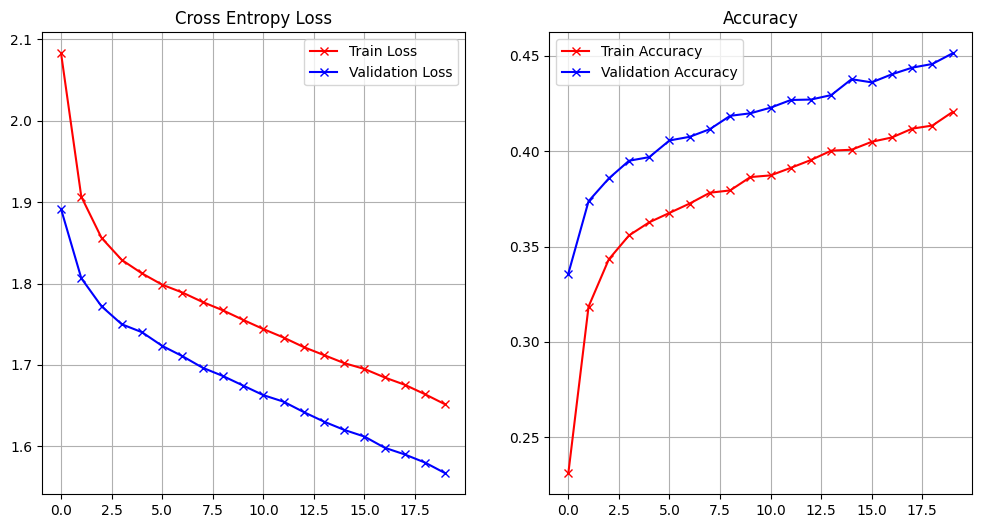

In [28]:
plot_loss_accuracy(history_3)

In [30]:
batch_size = 100
epoch = 30
opt = Adam(learning_rate=0.005)

model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_3_1 = model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_train, y_train))

plot_loss_accuracy(history_3_1)

Epoch 1/30
 51/500 [==>...........................] - ETA: 15s - loss: 2.5616 - accuracy: 0.1459

KeyboardInterrupt: 

In [ ]:
from keras.layers import AveragePooling2D, Input
#Lenet
model_4 = Sequential()

#Input
model_4.add(Input(shape=x_train.shape[1:]))

#Conv1
model_4.add(Conv2D(6, (5, 5), strides=(1,1), padding='same'))
model_4.add(Activation('tanh'))

#AvePool1
model_4.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model_4.add(Dropout(0.25))

#Conv2
model_4.add(Conv2D(16, (5, 5), strides=(1,1)))
model_4.add(Activation('tanh'))

#AvePool2
model_4.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model_4.add(Dropout(0.25))

#Conv3
model_4.add(Conv2D(120, (5, 5), strides=(1,1)))
model_4.add(Activation('tanh'))

#Flatten
model_4.add(Flatten())

#Dense
model_4.add(Dense(120, activation='tanh'))

#Dense
model_4.add(Dense(84, activation='tanh'))

#Final Classification
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.summary()

#### Conclusion


#type your answer here
